# IRIS FLOWER CLASSIFICATION

# Import Necessary Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from tabulate import tabulate

In [2]:
%matplotlib inline

# Data Pre-Processing

In [3]:
df = pd.read_csv('IRIS.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# check for Null Values

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Data Analysis

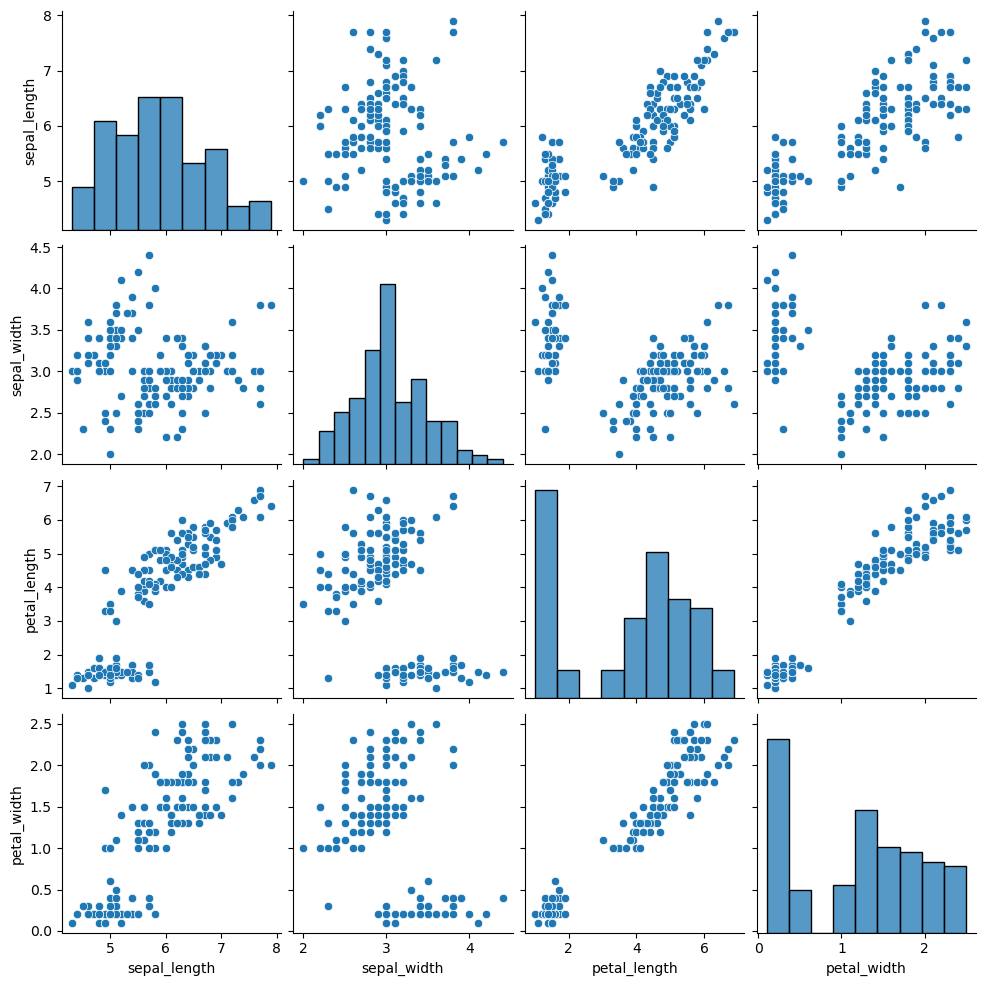

In [8]:
# pairplot

sns.pairplot(df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

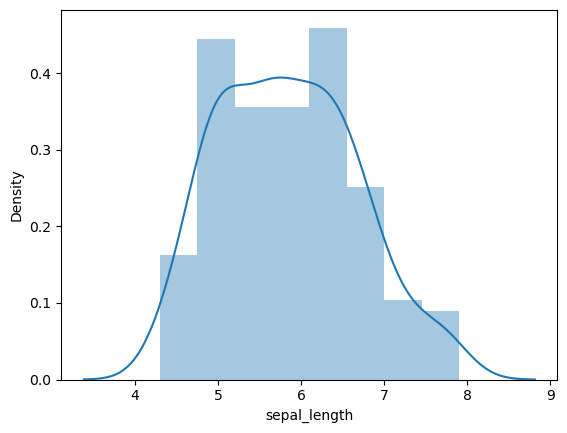

In [9]:
# distplot

sns.distplot(df['sepal_length'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

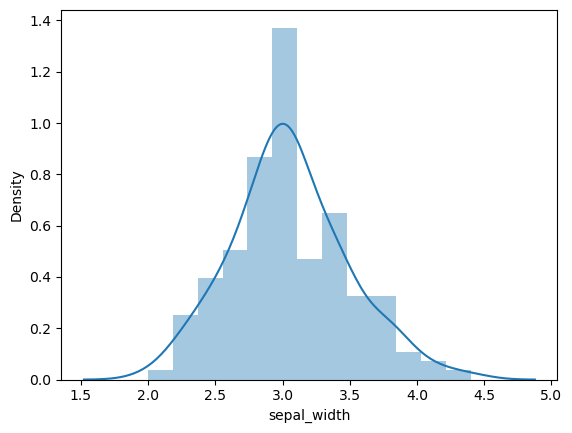

In [10]:
# distplot

sns.distplot(df['sepal_width'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal_length', ylabel='Density'>

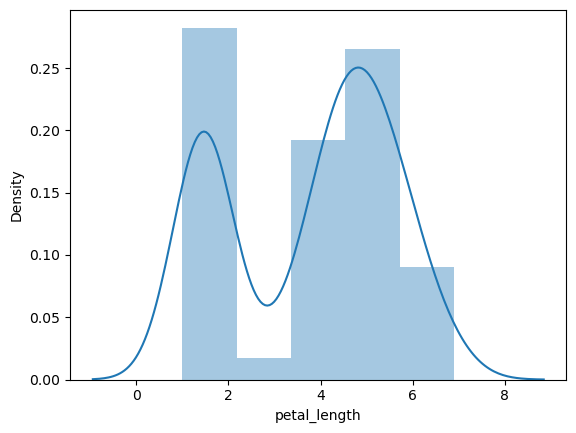

In [11]:
# distplot

sns.distplot(df['petal_length'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal_width', ylabel='Density'>

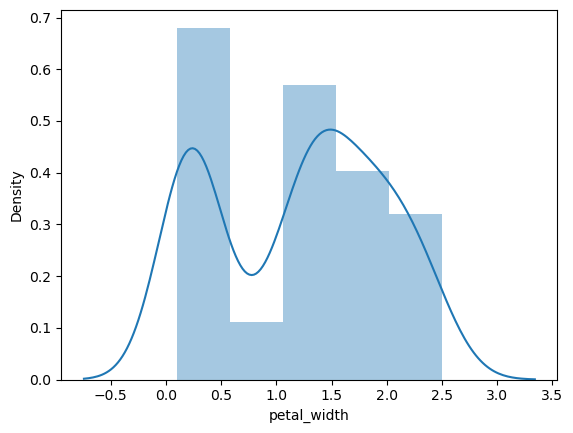

In [12]:
# distplot

sns.distplot(df['petal_width'])

<AxesSubplot:xlabel='species', ylabel='count'>

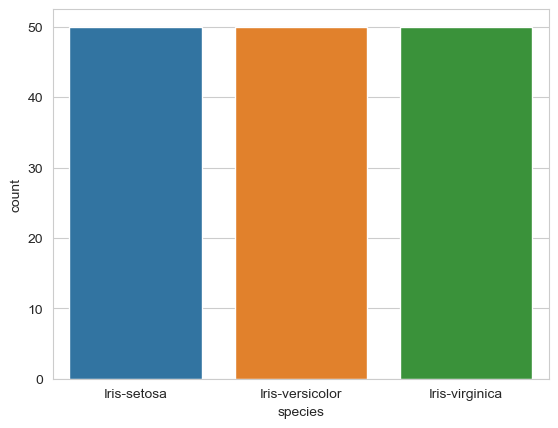

In [13]:
# countplot of species

sns.set_style('whitegrid')
sns.countplot(x = 'species' , data = df)

In [14]:
# encode target variable [species]

label = LabelEncoder()
y_encoded = label.fit_transform(df['species'])

In [15]:
df['y_encoded'] = y_encoded

In [16]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,y_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [17]:
# corelation

df.corr()

,sepal_length,sepal_width,petal_length,petal_width,y_encoded
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
y_encoded,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

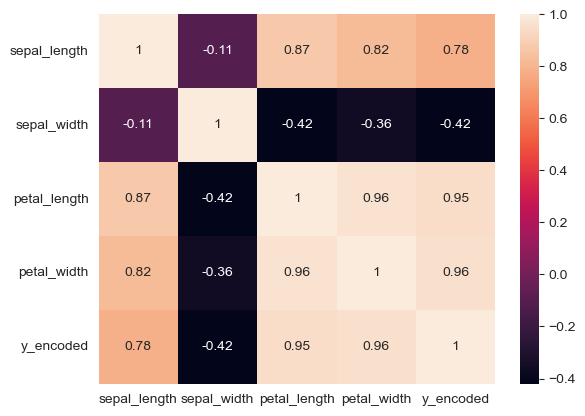

In [18]:
# corelation heatmap

sns.heatmap(df.corr() , annot = True)

# Train Test Split

In [19]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'y_encoded'],
      dtype='object')

In [20]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [21]:
y = df['y_encoded']

In [22]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20)

# Model Creation - Logistic Regression

In [23]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [24]:
model.fit(X_train , y_train)

LogisticRegression(max_iter=1000)

# Prediction Analysis

In [25]:
predictions = model.predict(X_test)

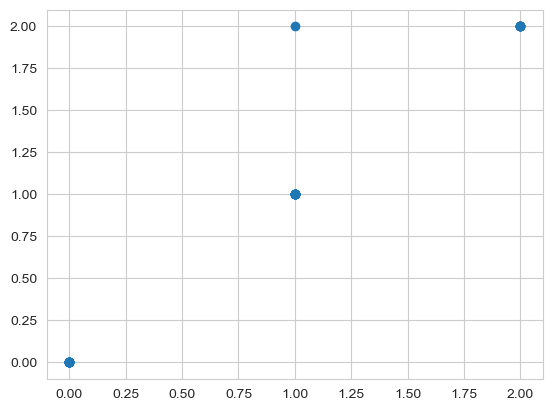

In [26]:
# scatter plot 

plt.scatter(y_test , predictions)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y_encoded', ylabel='Density'>

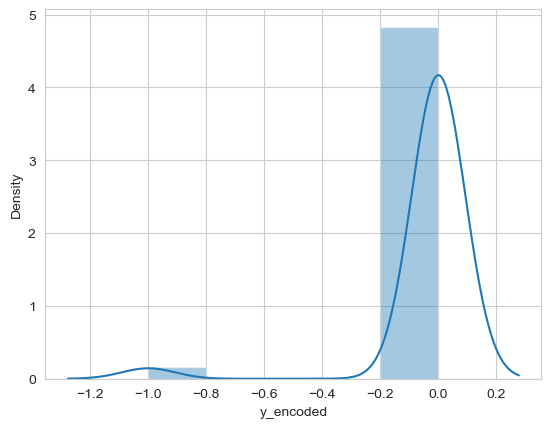

In [27]:
# dist plot

sns.distplot((y_test - predictions))

In [28]:
# metrics

def model_metrics(a , b):
    
    metrics_dict = {}
    
    metrics_dict['Accuracy'] = metrics.accuracy_score(a,b)
    metrics_dict['Precision'] = metrics.precision_score(a,b,average='weighted')
    metrics_dict['F1_Score'] = metrics.f1_score(a,b,average='weighted')
    metrics_dict['Recall'] = metrics.recall_score(a,b,average='weighted')
    metrics_dict['Confusion-Matrix'] = metrics.confusion_matrix(a,b)
    
    table = tabulate(metrics_dict.items() , headers = ["Metric" , "Value"] , tablefmt = "grid")
    
    return print(table)

In [29]:
model_metrics(y_test , predictions)

+------------------+--------------------+
| Metric           | Value              |
+==================+====================+
| Accuracy         | 0.9666666666666667 |
+------------------+--------------------+
| Precision        | 0.9714285714285714 |
+------------------+--------------------+
| F1_Score         | 0.9671550671550672 |
+------------------+--------------------+
| Recall           | 0.9666666666666667 |
+------------------+--------------------+
| Confusion-Matrix | [[13  0  0]        |
|                  |  [ 0 10  1]        |
|                  |  [ 0  0  6]]       |
+------------------+--------------------+
